In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.style as style
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics


In [3]:
df=pd.read_csv('Energy.csv')
df

Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                  0.7638         514.5      294.0     110.25             7.0   
1                  0.9800         514.5      294.0     110.25             7.0   
2                  0.9800         514.5      294.0     110.25             7.0   
3                  0.9800         514.5      294.0     110.25             7.0   
4                  0.9000         563.5      318.5     122.50             7.0   
..                    ...           ...        ...        ...             ...   
763                0.6400         784.0      343.0     220.50             3.5   
764                0.6200         808.5      367.5     220.50             3.5   
765                0.6200         808.5      367.5     220.50             3.5   
766                0.6200         808.5      367.5     220.50             3.5   
767                0.6200         808.5      367.5     220.50             3.5   

     Orientation  Glazing Area  Glazing Area Distribution  Heating Load  \
0              2           0.0                          0         15.55   
1              3           0.0                          0         15.55   
2              4           0.0                          0         15.55   
3              5           0.0                          0         15.55   
4              2           0.0                          0         20.84   
..           ...           ...                        ...           ...   
763            5           0.4                          5         17.88   
764            2           0.4                          5         16.54   
765            3           0.4                          5         16.44   
766            4           0.4                          5         16.48   
767            5           0.4                          5         16.64   

     Cooling Load  
0           21.33  
1           21.33  
2           21.33  
3           21.33  
4           28.28  
..            ...  
763         21.40  
764         16.88  
765         17.11  
766         16.61  
767         16.03  

[768 rows x 10 columns]

In [4]:
csv_file_path = 'Energy.csv'
df = pd.read_csv(csv_file_path)

In [10]:
int_col = df['Orientation']
int_col.unique()

array([2, 3, 4, 5], dtype=int64)

In [6]:
df.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


## Data Dictionary Column description

1. Relative Compactness - Highlights the impact of a shape on the energy efficiency of a building.(Float)
2. Surface Area - Total areas of a building, including external walls, roofs, and floors. Determines heat loss or gain through the building envelope(Float)
3. Wall Area -  total area of all exterior walls in the building.(Float)
4. Roof Area - Total area of the building's roof.(Float)
5. Overall Height - The total height of the building from the ground to the highest point.(Float)
6. Orientation -  The direction in which the building faces.(Integer)
7. Glazing Area - The total area of all windows and glazed doors in the building. (Float)
8. Glazing Area Distribution - how the glazing area is distributed across different sides of the building.(Integer)
9. Heating Load - the amount of heat energy required to maintain a comfortable indoor temperature.(Float)
10. Cooling Load - the amount of heat that must be removed from a building to maintain a comfortable indoor temperature.(Float)

In [8]:
df.shape

(768, 10)

# Exploratory Data Analysis (EDA)

## Univariate analysis

In [9]:
df.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

In [11]:
#descriptive statistics
np.round(df.describe(), 3)

Relative Compactness  Surface Area  Wall Area  Roof Area  \
count               768.000       768.000    768.000    768.000   
mean                  0.764       671.708    318.500    176.604   
std                   0.105        88.086     43.626     45.166   
min                   0.620       514.500    245.000    110.250   
25%                   0.682       606.375    294.000    140.875   
50%                   0.750       673.750    318.500    183.750   
75%                   0.820       741.125    343.000    220.500   
max                   0.980       808.500    416.500    220.500   

       Overall Height  Orientation  Glazing Area  Glazing Area Distribution  \
count         768.000      768.000       768.000                    768.000   
mean            5.250        3.500         0.234                      2.812   
std             1.751        1.119         0.133                      1.551   
min             3.500        2.000         0.000                      0.000   
25%             3.500        2.750         0.100                      1.750   
50%             5.250        3.500         0.250                      3.000   
75%             7.000        4.250         0.400                      4.000   
max             7.000        5.000         0.400                      5.000   

       Heating Load  Cooling Load  
count       768.000       768.000  
mean         22.307        24.588  
std          10.090         9.513  
min           6.010        10.900  
25%          12.992        15.620  
50%          18.950        22.080  
75%          31.668        33.132  
max          43.100        48.030

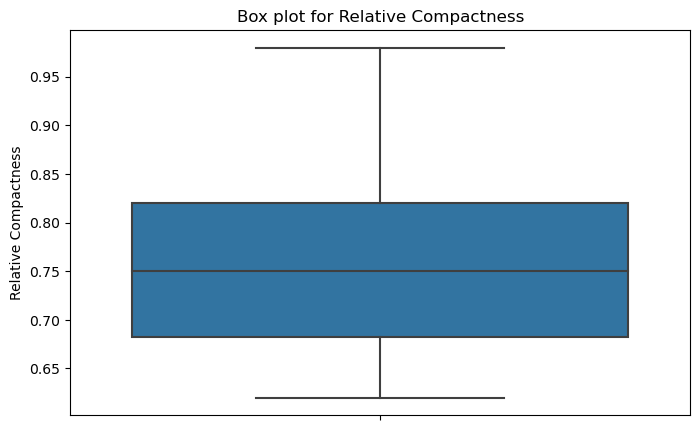

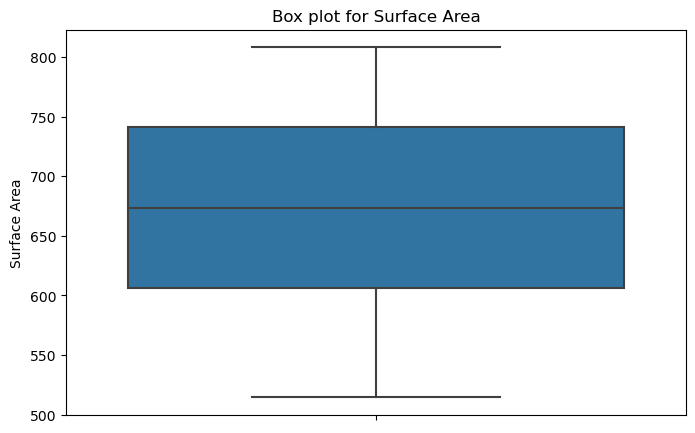

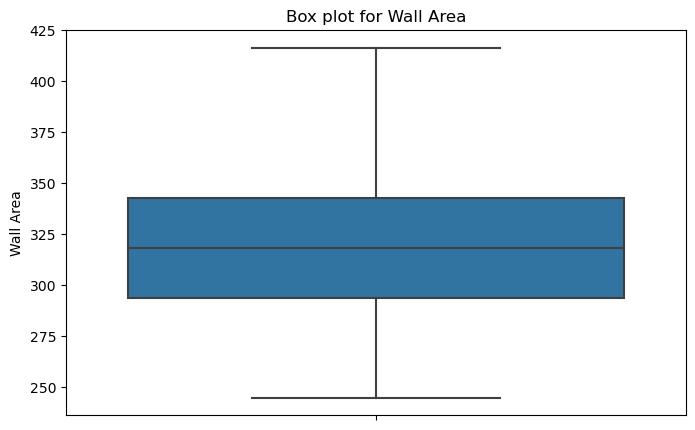

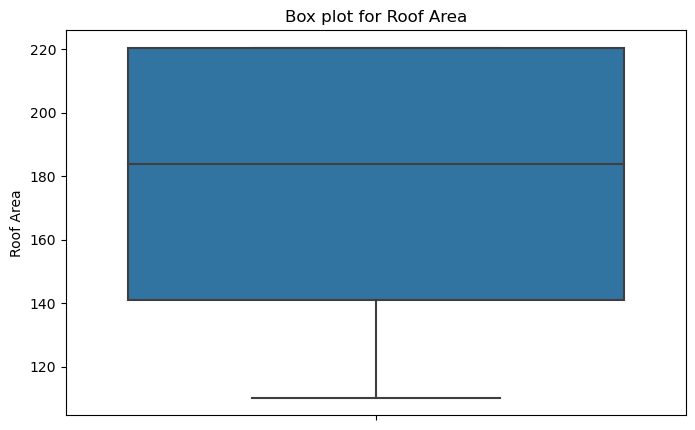

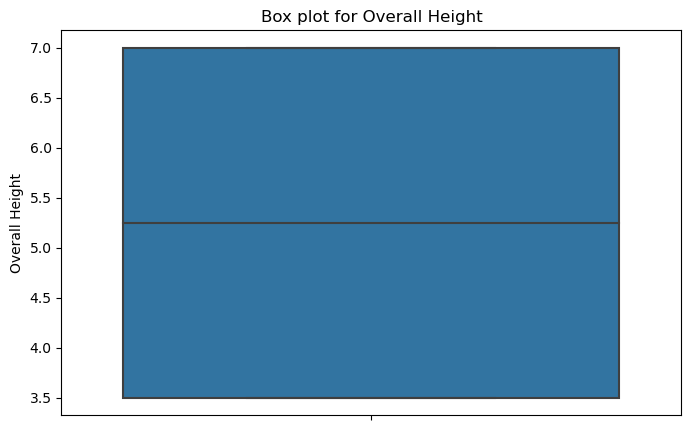

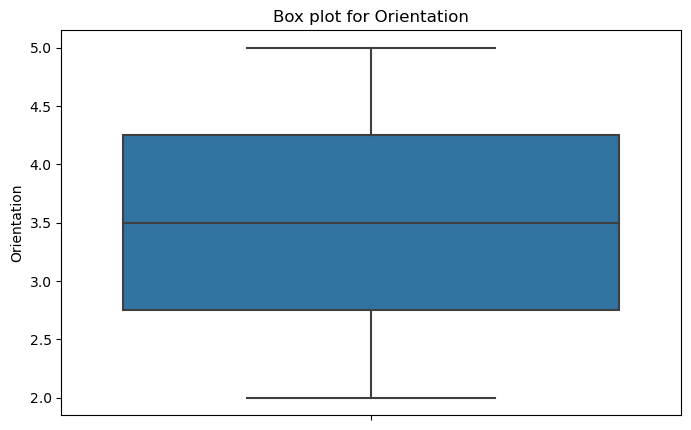

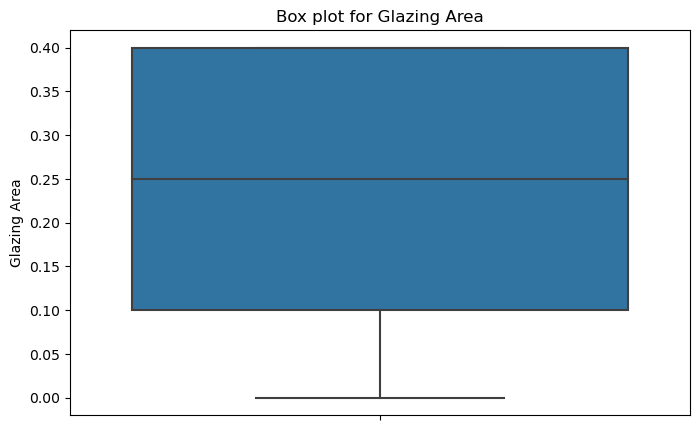

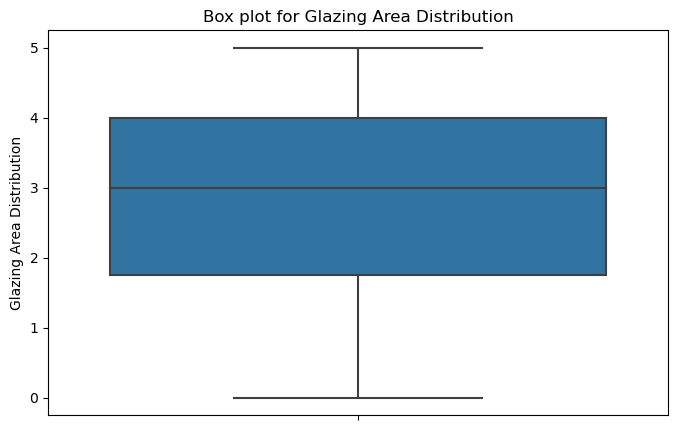

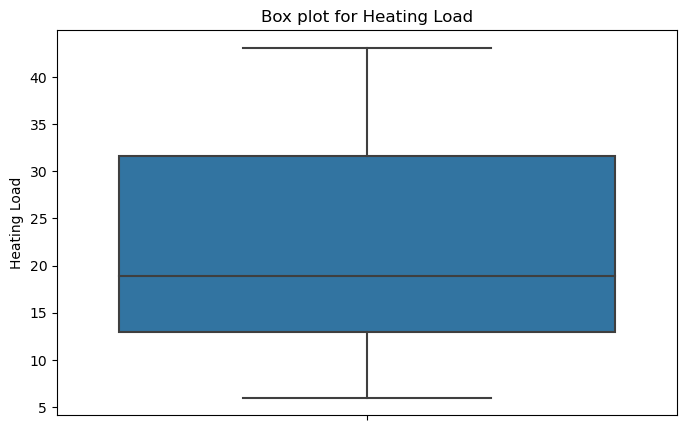

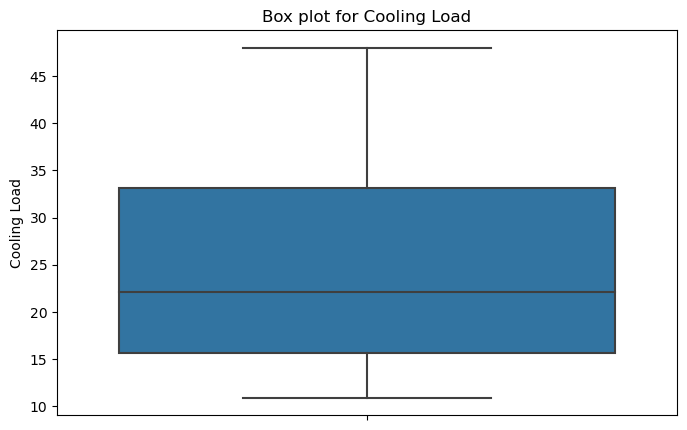

In [12]:
#Understanting the distribution of the data, central tendency, skeweness and Check for outliers
list_of_col = ['Relative Compactness','Surface Area','Wall Area','Roof Area','Overall Height','Orientation','Glazing Area','Glazing Area Distribution',
              'Heating Load','Cooling Load']
for col_name in list_of_col:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=col_name, data=df)
    plt.title(f'Box plot for {col_name}')

In [13]:
list_of_col = ['Relative Compactness','Surface Area','Wall Area','Roof Area','Overall Height','Orientation','Glazing Area','Glazing Area Distribution',
              'Heating Load','Cooling Load']

# use a for loop structure 

for col_name in list_of_col:
    
    fig = px.histogram(df, x=col_name)
    
    fig.update_layout(title={'text':f'Distribution of {col_name}' , 'x':0.5},
                        xaxis_title=f'{col_name}',
                        yaxis_title ='Frequency',
                        bargap =0.1)
    fig.show()

## Multivariate Analysis

Check how each feature affect the target variables.

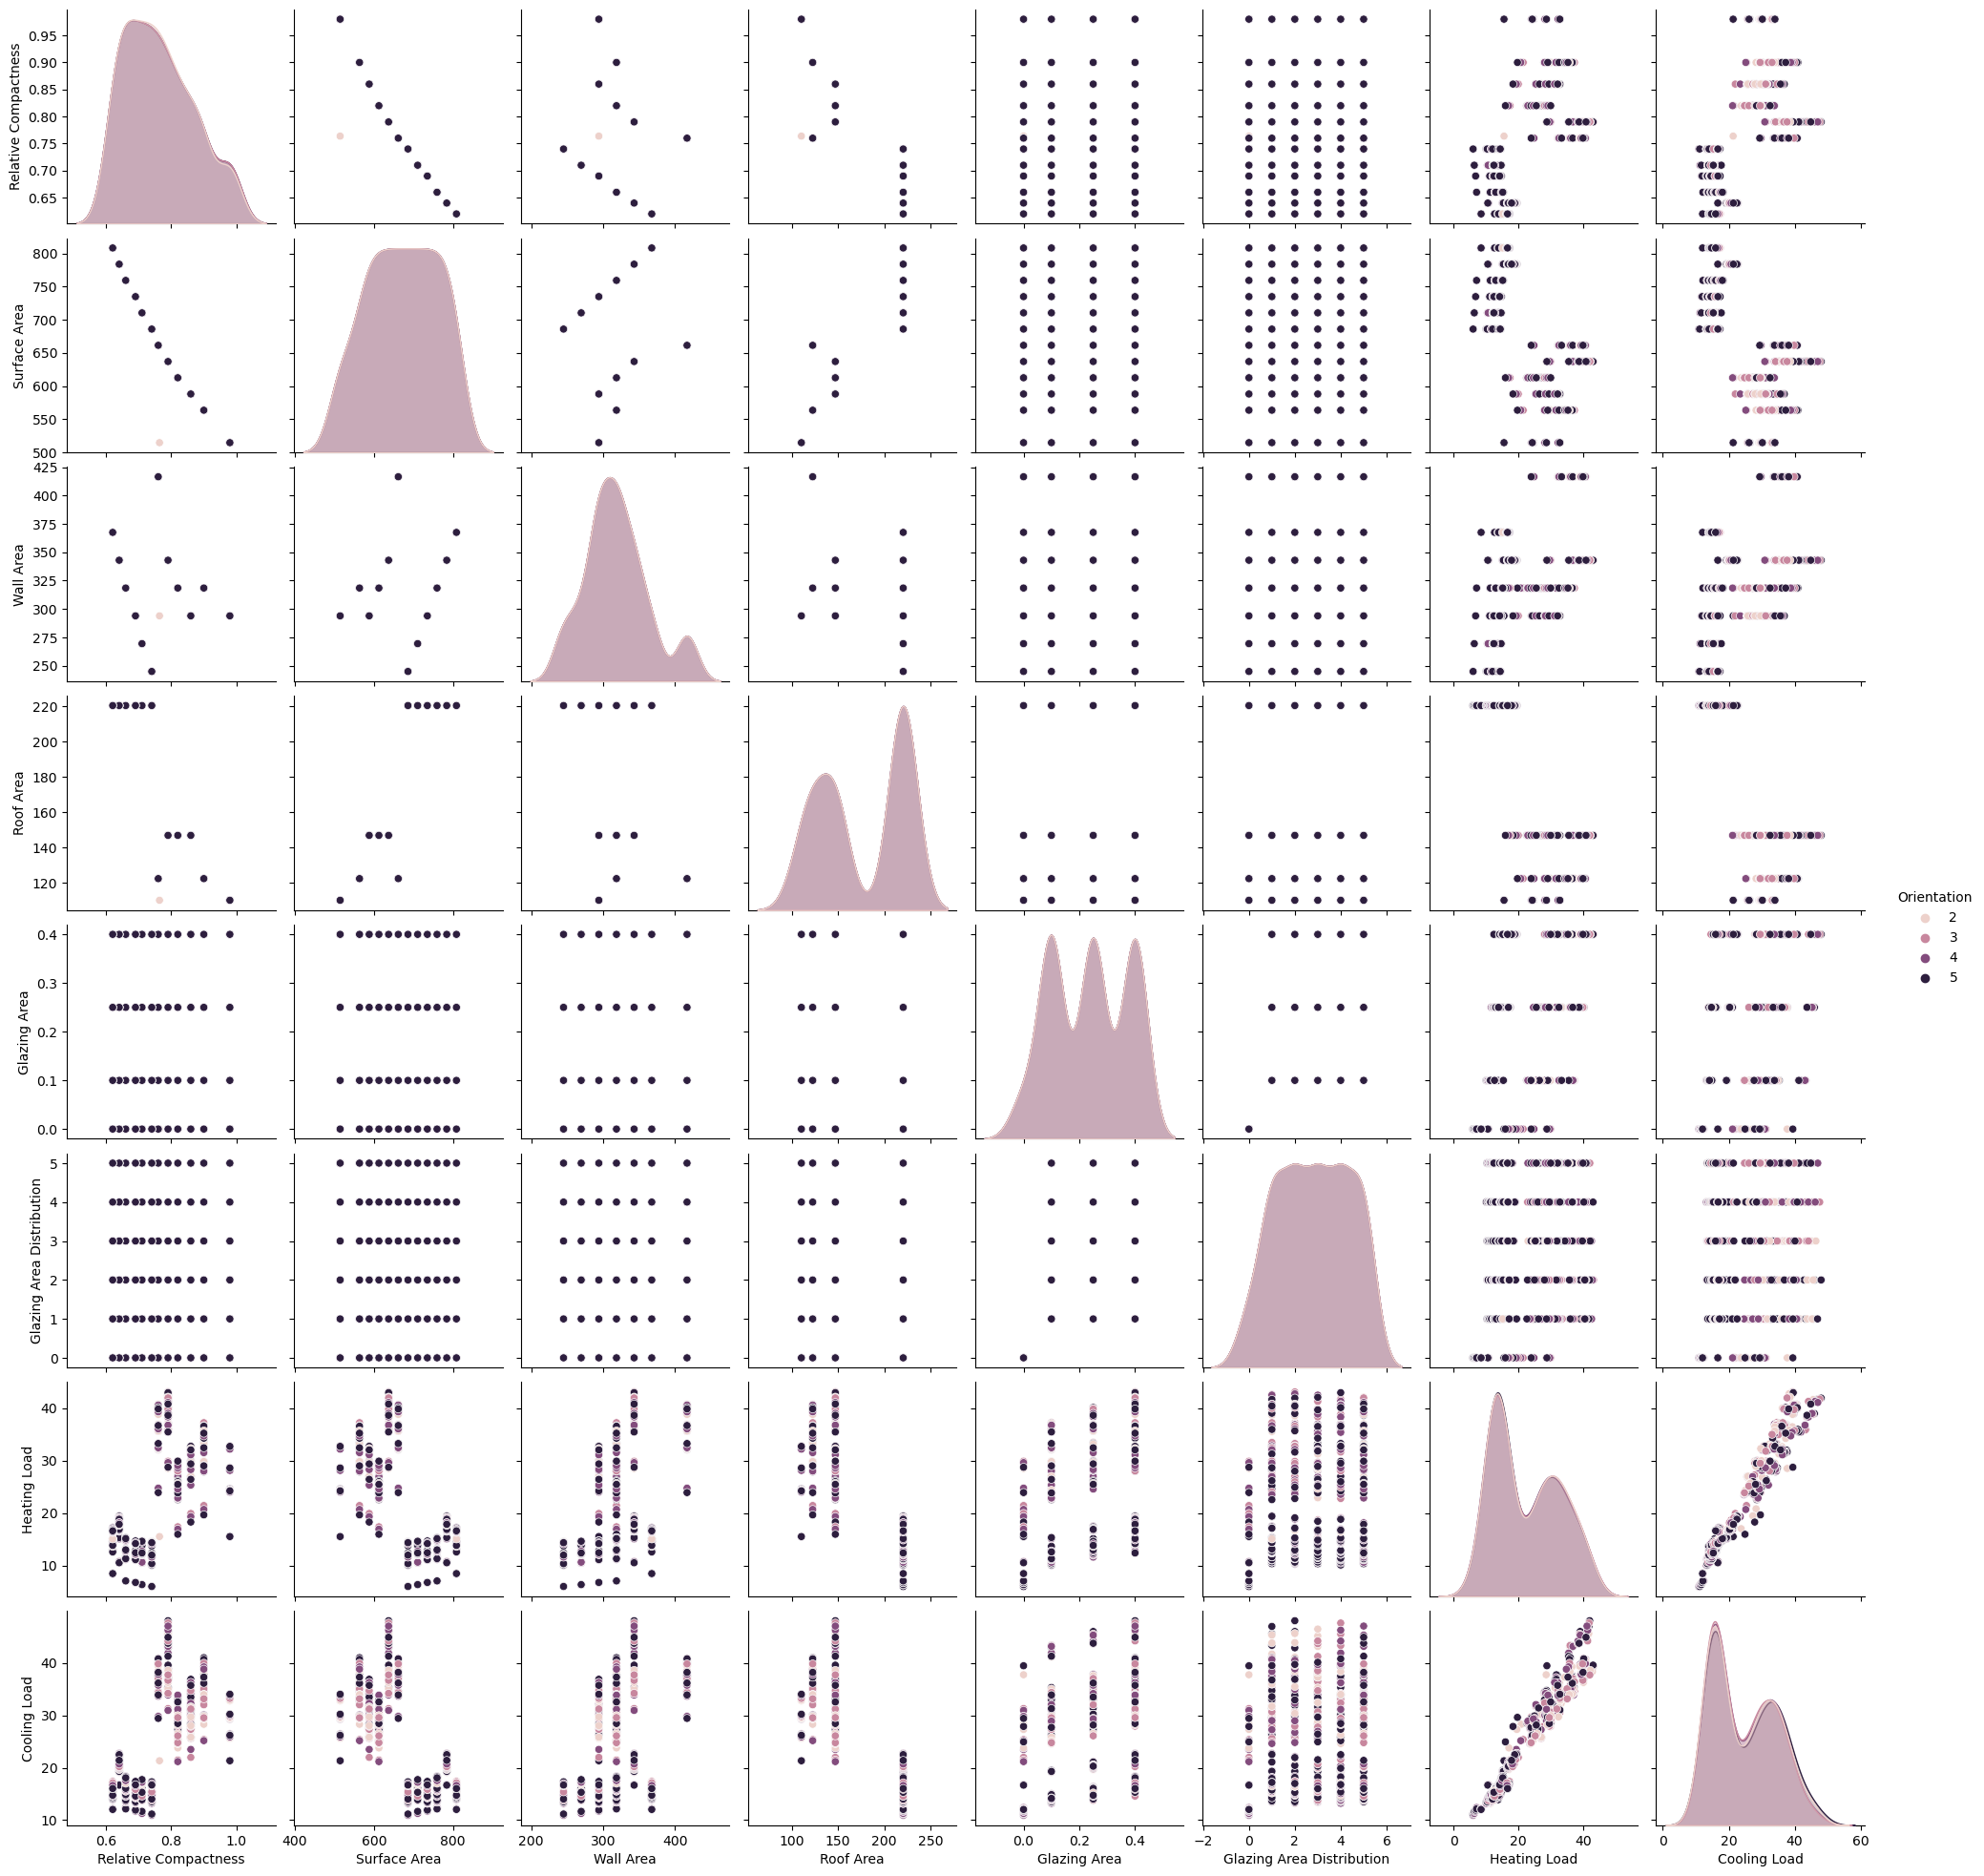

In [18]:
['Relative Compactness','Surface Area','Wall Area','Roof Area','Overall Height','Orientation','Glazing Area','Glazing Area Distribution',
              'Heating Load','Cooling Load']
remove_columns = ['Overall Height']
sns.pairplot(df.drop(columns=remove_columns), hue="Orientation")

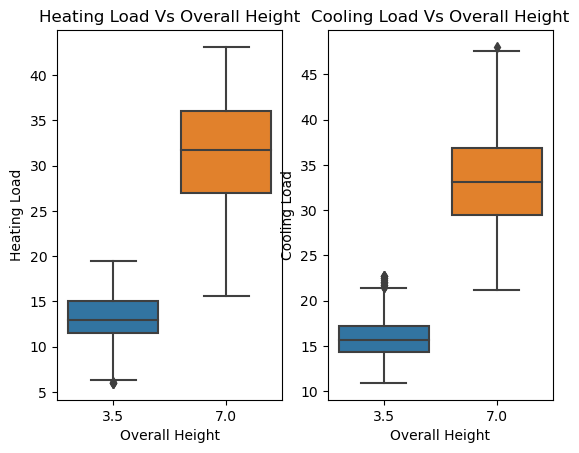

In [16]:
## relationship between catgorical variables and target variables.
fig, ax=plt.subplots(nrows=1, ncols=2)
sns.boxplot(data=df, x="Overall Height", y= "Heating Load", ax=ax[0])
ax[0].set_title("Heating Load Vs Overall Height") #set title for axis 0

sns.boxplot(data=df, x="Overall Height", y="Cooling Load", ax=ax[1])
ax[1].set_title("Cooling Load Vs Overall Height");

The higher the building, the higher heating/cooling load it needs.

<Figure size 1000x1000 with 0 Axes>

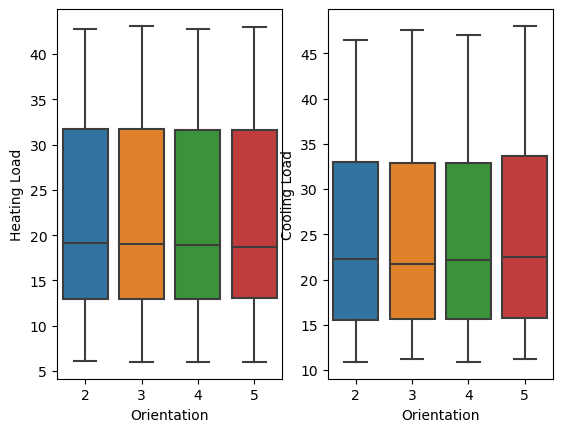

In [17]:
plt.figure(figsize=(10,10))
fig, ax=plt.subplots(nrows=1, ncols=2)
sns.boxplot(data=df, x="Orientation", y= "Heating Load", ax=ax[0])
sns.boxplot(data=df, x="Orientation", y="Cooling Load", ax=ax[1]);

Orientation has no influence on Heating/cooling load thus we can drop the variable

In [18]:
df.drop("Orientation", axis=1, inplace=True)

<Figure size 1000x1000 with 0 Axes>

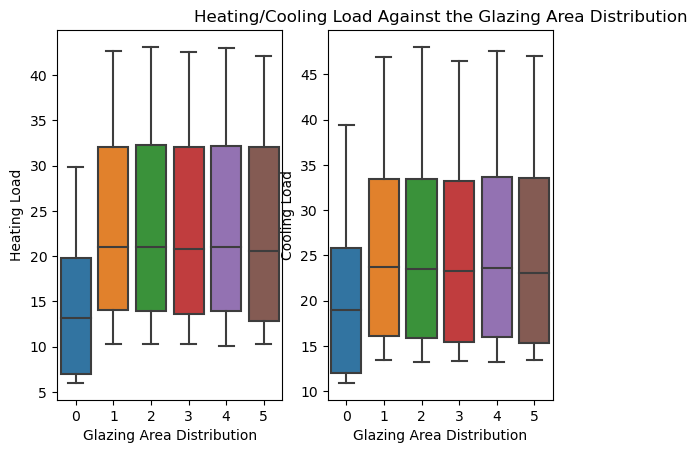

In [19]:
plt.figure(figsize=(10,10))
fig, ax=plt.subplots(nrows=1, ncols=2)
sns.boxplot(data=df, x="Glazing Area Distribution", y= "Heating Load", ax=ax[0])
sns.boxplot(data=df, x="Glazing Area Distribution", y="Cooling Load", ax=ax[1])
plt.title("Heating/Cooling Load Against the Glazing Area Distribution");

In [14]:
# Heating Load Vs Cooling Load

px.scatter(df, x='Heating Load',y='Cooling Load', title='Heating Load Vs Cooling Load',trendline='ols')

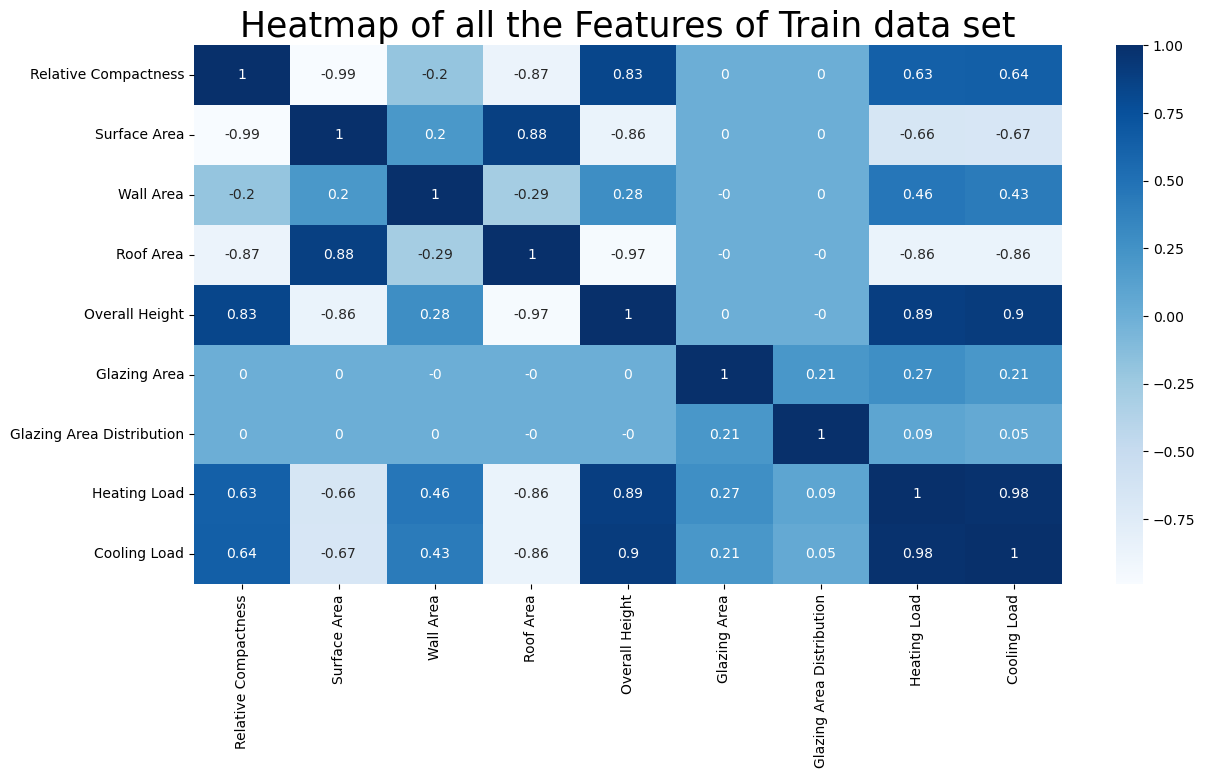

In [21]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'Blues');
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);

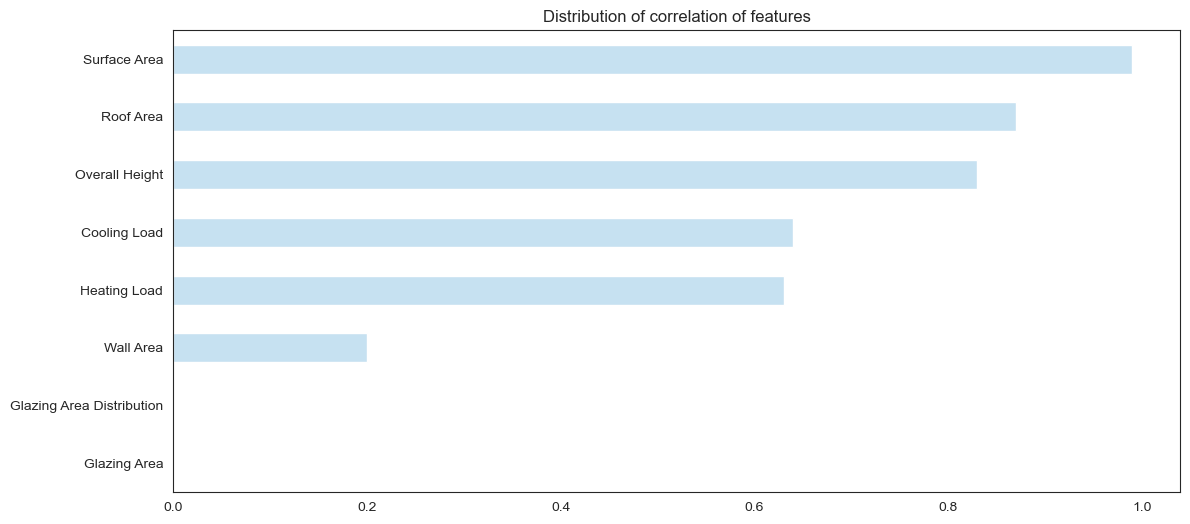

In [22]:
sns.set_style('white')
sns.set_palette('cubehelix_r')
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features')
abs(correlation['Relative Compactness']).sort_values()[:-1].plot.barh()
plt.show()

In [23]:
X = df[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Glazing Area', 'Glazing Area Distribution']]
Y = df[['Heating Load', 'Cooling Load']]
Y1= df[['Heating Load']]
Y2= df[['Cooling Load']]

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

MinMax = MinMaxScaler(feature_range= (0,1))
X_train = MinMax.fit_transform(X_train)
X_test = MinMax.transform(X_test)

In [25]:
X_train

array([[0.55555556, 0.33333333, 0.42857143, ..., 1.        , 0.25      ,
        0.2       ],
       [0.05555556, 0.91666667, 0.57142857, ..., 0.        , 1.        ,
        0.4       ],
       [0.66666667, 0.25      , 0.28571429, ..., 1.        , 0.625     ,
        0.4       ],
       ...,
       [0.25      , 0.66666667, 0.14285714, ..., 0.        , 0.25      ,
        1.        ],
       [1.        , 0.        , 0.28571429, ..., 1.        , 0.625     ,
        0.8       ],
       [0.77777778, 0.16666667, 0.42857143, ..., 1.        , 0.25      ,
        0.4       ]])

In [29]:
# Linear Regression
linear_model = LinearRegression()

linear_model.fit(X_train, Y_train)

y_pred_linear = linear_model.predict(X_test)

# Decision Tree Regressor
tree_model = DecisionTreeRegressor()

tree_model.fit(X_train, Y_train)

y_pred_tree = tree_model.predict(X_test)

# Random Forest Regressor
forest_model = RandomForestRegressor()

forest_model.fit(X_train, Y_train)

y_pred_forest = forest_model.predict(X_test)


In [32]:
# Evaluation metrics
def evaluate_model(y_true, y_pred, model_name):

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    print(f"Metrics for {model_name}:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print("\n")

In [33]:
# Evaluate each model
evaluate_model(Y_test, y_pred_linear, "Linear Regression")
evaluate_model(Y_test, y_pred_tree, "Decision Tree Regressor")
evaluate_model(Y_test, y_pred_forest, "Random Forest Regressor")

Metrics for Linear Regression:
MAE: 2.44
RMSE: 3.27


Metrics for Decision Tree Regressor:
MAE: 0.87
RMSE: 1.65


Metrics for Random Forest Regressor:
MAE: 0.86
RMSE: 1.58




### We'll use the random forest model since it has the smallest MAE and RMSE

In [34]:
RC                      = float(input('Relative Compactness : '))
SA                    = float(input('Surface Area : '))
WA                    = int(input('Wall Area: '))
OH                    = float(input('Roof Area : '))
Orient                  = int(input('Orientation : '))
GA                  = int(input('Glazing Area : '))
GAD                    = float(input('Glazing Area Distribution : '))



inputs   = [RC,SA,WA,OH,Orient,GA,GAD ]

columns_name =['Relative Compactness','Surface Area','Wall Area','Roof Area','Overall Height','Orientation','Glazing Area','Glazing Area Distribution']

dict_ = dict(zip(columns_name, inputs))

newdf = pd.DataFrame([dict_])

y_results = forest_model.predict(newdf)

print('Inputs:',inputs)
print('-------------------------------')

print('Prediction :',y_results)


Relative Compactness : 23
Surface Area : 3
Wall Area: 2
Roof Area : 3
Orientation : 3
Glazing Area : 3
Glazing Area Distribution : 3
Inputs: [23.0, 3.0, 2, 3.0, 3, 3, 3.0]
-------------------------------
Prediction : [[34.22444361 34.87383631]]


In [35]:
#Check for the prediction on the train dataset
y_prediction_train = tree_model.predict(X_train)
y_prediction_train

array([[23.7       , 25.61      ],
       [19.07333333, 21.91333333],
       [29.18      , 30.77      ],
       ...,
       [11.46      , 14.02      ],
       [28.49      , 29.97333333],
       [28.53666667, 32.03333333]])

<Axes: xlabel='Importance', ylabel='Features'>

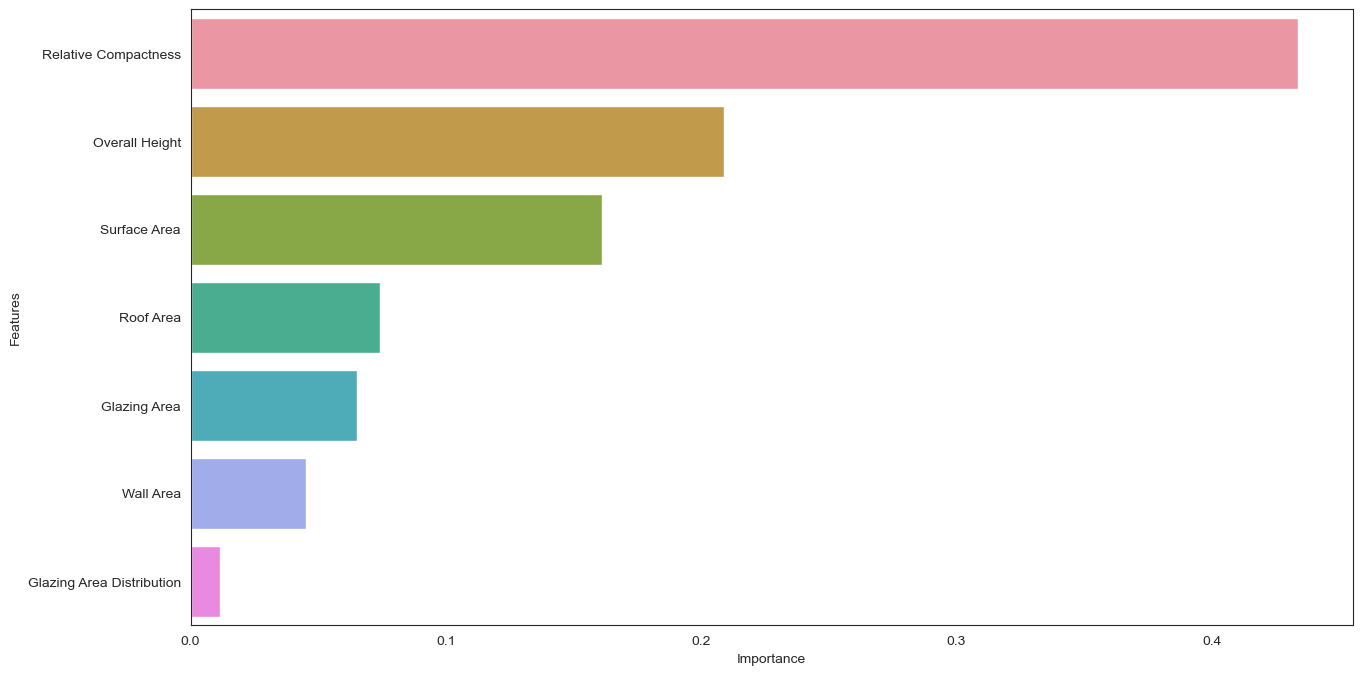

In [39]:
#Feature Importances

forest_model.feature_importances_

feature_impo_df = pd.DataFrame({'Features':X.columns, 'Importance':forest_model.feature_importances_})
feature_impo_df.sort_values(by='Importance', ascending=False, inplace=True)
feature_impo_df

plt.figure(figsize=(15,8))
sns.barplot(data=feature_impo_df, y='Features',x='Importance' )

### So the most important feature inour random forest model is the realtive compactnes. 

# Recommmedation

Improving energy efficiency in a building involves optimizing various factors such as surface area, wall area, roof area, overall height, orientation, glazing area, glazing area distribution, heating load, and cooling load. Here are some recommendations for each aspect:

1. Surface Area:
- Minimize External Surface Area: Design the building with a compact shape to reduce the external surface area, which helps in minimizing heat loss or gain.

2. Wall Area:
- High Thermal Insulation: Use high-quality insulation materials for walls to reduce heat transfer through the building envelope.
- Optimal Window-to-Wall Ratio: Limit the amount of window area to minimize heat loss or gain. Balance natural light and energy efficiency.

3. Roof Area:
- Cool Roofing: Choose reflective roofing materials to reduce heat absorption and minimize the cooling load.
- Insulation: Insulate the roof adequately to prevent heat transfer between the interior and exterior.

4. Overall Height:
- Low-rise Design: In general, lower buildings have less surface area, reducing the overall energy requirements.

5. Orientation:
- Passive Solar Design: Align the building to maximize or minimize exposure to the sun, depending on the climate. Use passive solar design principles to optimize natural heating and cooling.

6. Glazing Area:
- High-Performance Windows: Invest in energy-efficient windows with low U-values and high solar heat gain coefficients (SHGC) to minimize heat loss and gain.
- Use of Double Glazing: Double or triple glazing can enhance insulation properties and reduce heat transfer.

7. Glazing Area Distribution:
- Strategic Placement: Concentrate windows on the south side for passive solar heating while minimizing exposure on the east and west sides to control heat gain.

8. Heating Load:
- Efficient Heating Systems: Use high-efficiency heating systems, such as condensing boilers or heat pumps, to reduce energy consumption.
- Zoning: Implement zoning systems to heat only occupied spaces, optimizing energy use.

9. Cooling Load:
- Shading: Use external shading devices like awnings, shades, or vegetation to reduce direct sunlight and control cooling loads.
- Natural Ventilation: Incorporate natural ventilation strategies to minimize the need for mechanical cooling.
